# <b>Question 5</b>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

## <b>Part 5.1</b>

(1000, 750)


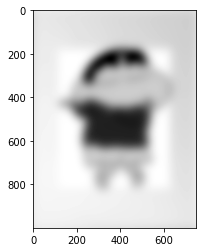

In [ ]:
shinB = cv2.imread("../images/shinchan_blur.png")
# shinB = cv2.cvtColor(shinB,cv2.COLOR_BGR2RGB)
shinB = cv2.cvtColor(shinB,cv2.COLOR_RGB2GRAY)
print(shinB.shape)
plt.imshow(shinB,cmap='gray')

In [ ]:
def FFT1D(a):
    if a.shape[0]==1:
        return a
    a_odd = a[1::2]
    a_even = a[::2]
    F_odd = FFT1D(a_odd)
    F_even = FFT1D(a_even)
    aFFT = np.zeros(a.shape[0],dtype='complex64')
    out = np.zeros(a.shape[0]//2,dtype='complex64')
    R = np.arange(a.shape[0]//2)
    out = np.exp(-2j*np.pi*R/a.shape[0])
#     out_odd = out*F_odd
#     print(aFFT[:a.shape[0]//2].shape)
#     print(np.array(F_even + out*F_odd).shape)
    aFFT[:a.shape[0]//2] = F_even + out*F_odd
    aFFT[a.shape[0]//2:] = F_even - out*F_odd
    return aFFT.astype('complex64')

def FFT2D(a):
    if a.shape[0]==1:
        return a
    flag1 = abs(np.log2(a.shape[0]) - int(np.log2(a.shape[0])))
    flag2 = abs(np.log2(a.shape[1]) - int(np.log2(a.shape[1])))
    #Row Case
    if flag1!=0:
        #Add zeros
        r_zero = np.zeros((int(2**(np.ceil(np.log2(a.shape[0]))))-a.shape[0],a.shape[1]))
        a = np.append(a,r_zero,axis=0)
    #Col Case
    if flag2!=0:
        #Add zeros
        c_zero = np.zeros((a.shape[0],int(2**(np.ceil(np.log2(a.shape[1]))))-a.shape[1]))
        a = np.append(a,c_zero,axis=1)
    
    out = np.zeros_like(a,dtype='complex64')
    #Row-Wise
    for i in range(a.shape[0]):
        out[i] = FFT1D(a[i])
    #Col-Wise
    for i in range(out.shape[1]):
        out[:,i] = FFT1D(out[:,i])

    return out



def InvFFT1D(x):
    s1 = x.copy()
    #Psedo-reverse 1 to N-1
    s1[1:] = s1[:0:-1]
    InvFFT1D = FFT1D(s1)/s1.shape[0]
    return InvFFT1D

def InvFFT2D(a):
    if a.shape[0]==1:
        return a
    out = np.zeros_like(a,dtype='complex64')
    #Row-Wise
    for i in range(a.shape[0]):
        out[i] = InvFFT1D(a[i])
    #Col-Wise
    for i in range(out.shape[1]):
        out[:,i] = InvFFT1D(out[:,i])
    Inv2D = np.real(out)
    return Inv2D

In [ ]:
def gaussFilt(img,D):
    filD = filt.copy()
    R,C = np.shape(img)
    
    for r in range(R):
        for c in range(C):
            filD[r,c] = np.sqrt(r**2 + c**2)
    
    for i in range(R):
        for j in range(C):
            val = filD[np.abs(i - (img.shape[0]//2)),np.abs(j - (img.shape[1]//2))]
            filt[i,j] = np.exp(-(val**2)/(2*D**2))*img[i,j]


    return filt

In [ ]:
def gausFilter(img,s):
    out = img.copy()
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            val = np.exp(-1*(i**2 + j**2)/(2*(s**2)))
            val = val/(2*np.pi*(s**2))
#             print(val)
            out[i,j] = val
    return out

In [ ]:
shinF = FFT2D(shinB)

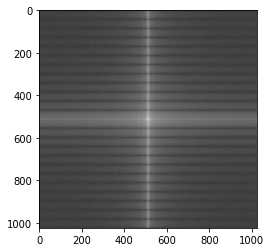

In [ ]:
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(shinF))),cmap='gray')

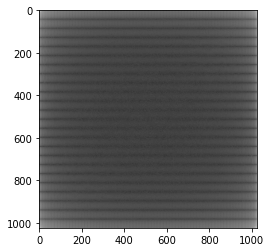

In [ ]:
plt.imshow(np.log(1 + np.abs(shinF)),cmap='gray')

In [98]:
f = np.zeros(shinB.shape)
sigma = 10000


f = cv2.resize(f,(1024,1024),cv2.INTER_AREA)
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        r2 = (i-f.shape[0]//2)**2 + (j-f.shape[1]//2)**2
        num = math.exp(-r2/(2*sigma**2))
        f[i,j] = num/(2*np.pi*sigma**2)
# f = (f/f.max())*255
# plt.imshow(f.astype(int),cmap='gray')

In [119]:
qq = f.copy()
qq = ((qq-np.min(qq))/(np.max(qq)-np.min(qq)))*255

In [120]:
print(qq.max())

255.0


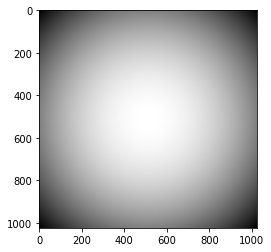

In [121]:
plt.imshow(qq,cmap='gray')

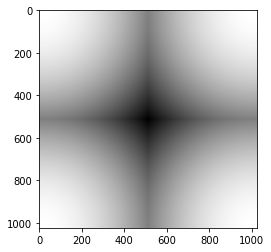

In [122]:
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(f))),cmap='gray')

In [137]:
# x,resid,rank,s = np.linalg.lstsq(shinF.copy(),np.fft.fftshift(qq),rcond=-1)
qqq = shinF.copy()/np.fft.fftshift(qq+10**-6)

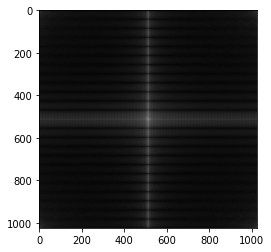

In [138]:
plt.imshow(np.log(1+np.abs(np.fft.fftshift(qqq))),cmap='gray')